In [2]:
%matplotlib nbagg
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
#from alvra_tools.channels_res import *
from alvra_tools.channels import *
from alvra_tools.utils import errfunc_fwhm, errfunc_sigma

In [3]:
#scan_name ="YAG_jet_time_zero_pink_350nm_032"
scan_name ="/"

#DIR = "/sf/alvra/data/p17807/res/scan_data/" + scan_name + "/"
DIR = "/sf/alvra/data/p17589/res/"
DIR_json = "/sf/alvra/data/p17807/res/scan_info/"

!ls -lah -t $DIR

total 19G
-rw-r--r--.   1     39147 p17589  45M Jul 16 16:20 test_PBPS122_withOUT_002.h5
drwxrws---.  13 root      p17589 4.0K Jul 16 16:20 .
-rw-r--r--.   1     39147 p17589  45M Jul 16 16:19 test_PBPS122_with_001.h5
drwxrwsr-x.   2     39147 p17589  32K Jul 11 16:49 JF_pedestals
drwxrwsr-x.   2     39147 p17589  32K Jul 11 14:28 scan_info
drwxrwsr-x.   6 cirelli_c p17589 4.0K Jul 10 15:39 alvra_beamline_new_scripts
drwxrwsr-x.   5 cirelli_c p17589  32K Jul  9 15:32 alvra_beamline_watch
drwxrwsr-x. 114     39147 p17589  32K Jul  7 19:00 scan_data
drwxrwsr-x.   3 cirelli_c p17589 4.0K Jun 25 11:32 cropped_data
drwxr-xr-x.  17 root      root    64K Jun  1 14:31 ..
drwxrwsr-x.   3     39147 p17589 4.0K May  1 10:11 python
-rw-r--r--.   1     39147 p17589 508M Mar 25 10:08 jf_create_pedestals.tgz
drwxrwsr-x.   7     39147 p17589 4.0K Mar  6 22:57 jungfrau
drwxrwsr-x.   2 root      p17589 4.0K Feb 28 10:44 run_control
drwxrwsr-x.   2     39147 p17589 4.0K Oct 31  2018 monoscan_20uJ_143.55_

In [42]:
fn = DIR + scan_name + "test_PBPS122_with_001.h5"

IzeroFEL_pump, IzeroFEL_unpump, Variable, PulseIDs = load_FEL_pp_pulseID(fn, channel_energy, 50, 25, nshots=None)
print (np.abs(IzeroFEL_pump.mean())/np.abs(IzeroFEL_unpump.mean()))

0.8044890292114734


<IPython.core.display.Javascript object>


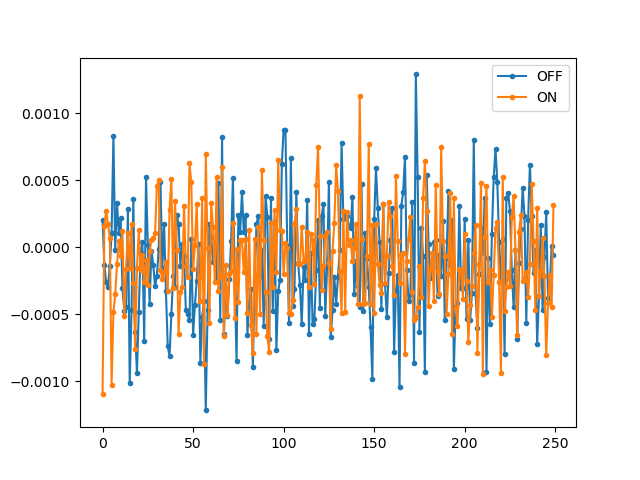

In [43]:
plt.figure()
plt.plot(IzeroFEL_unpump, label = 'OFF', marker='.')
plt.plot(IzeroFEL_pump, label = 'ON', marker='.')
plt.legend(loc="best")
plt.show()
#plt.savefig('Timescan_7_diode')

In [35]:
number_shots = []
for i in range(0,10):
    filename = DIR + scan_name + "_step000%s.BSREAD.h5" % i
    data, pid = load_single_channel(filename, channel_LaserDiode, 18)
    number_shots.append(len(data))
    
